In [1]:
import tensorflow as tf
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import estimator
import pandas as pd

In [2]:
def normalize(df):    
    return (df - df.min()) / (df.max() - df.min())

def denormalize(df,norm_data):    
    return (norm_data * (df.max() - df.min())) + df.min()

In [3]:
tf.reset_default_graph()
df = pd.read_csv('./data/finalData/1512.csv')
df['out']=df['out']*1
df = df.dropna(inplace=False)


msk = np.random.rand(len(df)) < 0.6
df_train = df[msk]    
df_test = df[~msk]

X_train = normalize(df_train.drop(['out'],axis=1)).values
y_train = df_train['out'].values

X_test = normalize(df_test.drop(['out'],axis=1)).values
y_test = df_test['out'].values

feat_cols=[tf.feature_column.numeric_column('x', shape=[961])]

In [4]:
deep_model=tf.estimator.DNNClassifier(feature_columns=feat_cols, 
                                      n_classes=2,
                                   hidden_units=[1000,1000,1000,1000,1000,1000], 
                                   activation_fn=tf.nn.relu,
                                     optimizer=tf.train.GradientDescentOptimizer(0.0001),
                                     model_dir='./model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_save_checkpoints_secs': 600, '_master': '', '_task_id': 0, '_tf_random_seed': None, '_train_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f85de756550>, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_model_dir': './model', '_session_config': None, '_log_step_count_steps': 100, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_service': None, '_num_worker_replicas': 1, '_is_chief': True}


In [5]:
input_fn = estimator.inputs.numpy_input_fn(x={'x':X_train}, 
                                           y=y_train,
                                           shuffle= True,
                                           num_epochs=5000,
                                           batch_size=100)

In [7]:
train = deep_model.train(input_fn=input_fn, steps=5000)

In [ ]:
input_fn_eval = estimator.inputs.numpy_input_fn( x = {'x':X_test},
                                                y =  y_test,
                                                shuffle = False)

preds=list(deep_model.evaluate(input_fn=input_fn_eval))

predictions = [p['class_ids'][0] for p in preds]
#predictions

pred = np.asarray(predictions)

f = pred == y_test
print(len(f))

T = len(f[f == True])
F = len(f[f == False])
print(T, F, T+F)
error = F/(T+F) * 100
print(error)

plt.scatter(range(len(y_test)),y_test,label="Original Rating")

#plt.legend(loc='best')
plt.show()

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-06-08:10:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-06-08:10:17
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9541985, accuracy_baseline = 0.5398037, auc = 0.99476165, auc_precision_recall = 0.9955543, average_loss = 0.115033865, global_step = 5000, label/mean = 0.5398037, loss = 14.064807, precision = 0.92655367, prediction/mean = 0.54464954, recall = 0.9939394


In [21]:
predictions = [p['class_ids'][0] for p in preds]
#predictions

In [22]:
pred = np.asarray(predictions)

In [23]:
f = pred == y_test
print(len(f))

1152


In [24]:
T = len(f[f == True])
F = len(f[f == False])
print(T, F, T+F)
error = F/(T+F) * 100
print(error)

1009 143 1152
12.413194444444445


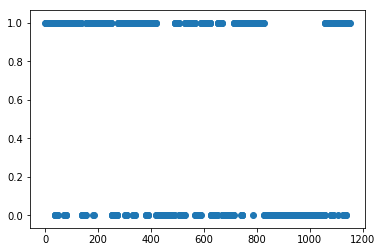

In [25]:
plt.scatter(range(len(y_test)),y_test,label="Original Rating")

#plt.legend(loc='best')
plt.show()

(-1, 2)

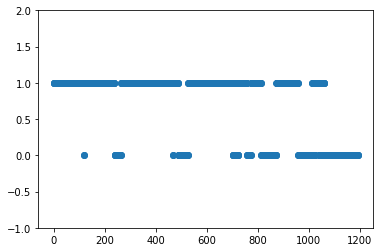

In [51]:
plt.scatter(range(len(pred)),pred,label="Predicted Rating", )
plt.ylim(-1,2)